In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Load Dataset (Bitcoin Price)
df_bitcoin = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/bitcoin_price.csv',index_col='Date', parse_dates=True)
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [46]:
# Load Dataset (Airline Passengers)
df_airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/airline_passengers.csv',index_col='Month',parse_dates=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
# Question No. 1 (Write answer on paper)
# What is the final expanded mean 'Close' price of bitcoin in 30 day window
# Answer: 14574.914414
df_bitcoin_expand = df_bitcoin['Close'].expanding(30).mean()
df_bitcoin_expand.tail()

,Close
Date,
2023-12-26,14541.848488
2023-12-27,14550.376375
2023-12-28,14558.658817
2023-12-29,14566.780534
2023-12-30,14574.914414


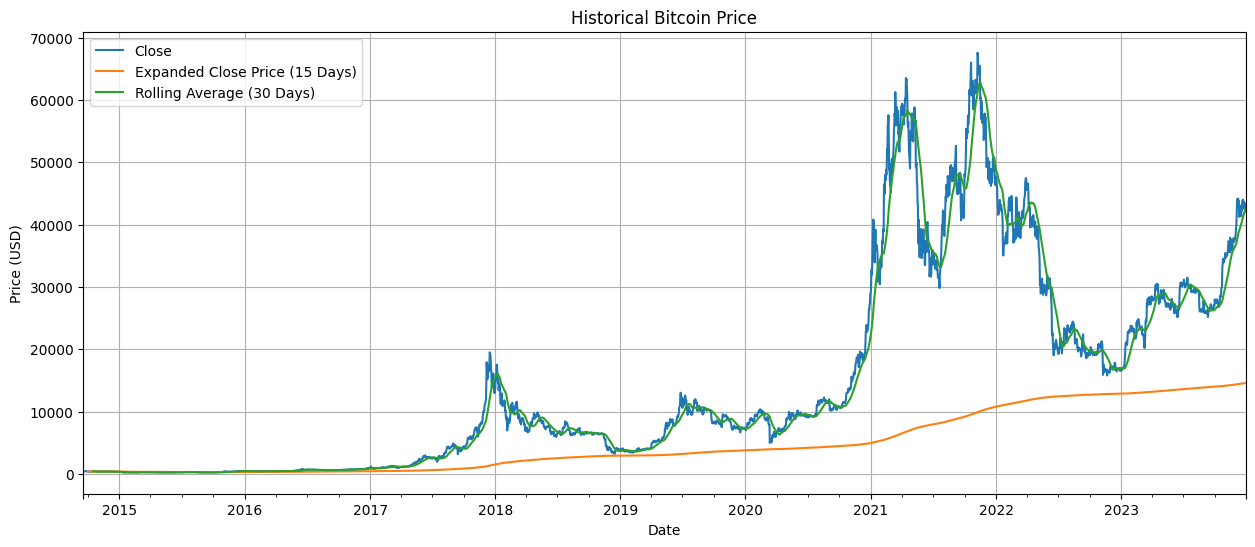

In [48]:
# Question No. 2 (Write on 'Notebook')
# Project the graph with (15,6) size
df_bitcoin['Expanded Close Price (15 Days)'] = df_bitcoin['Close'].expanding(15).mean()
df_bitcoin['Rolling Average (30 Days)'] = df_bitcoin['Close'].rolling(30).mean()
ax = df_bitcoin[['Close','Expanded Close Price (15 Days)', 'Rolling Average (30 Days)']].plot(figsize=(15,6), title="Historical Bitcoin Price", grid=True, ylabel="Price (USD)")

In [49]:
# Question No. 3 (Write answer on paper)
# Based on the graph above, what can you generalize about bitcoin prices?
# Answer: On paper

In [50]:
# Question No. 4
# What is the highest and lowest Bitcoin 'Close' Prices from 2021 to 2023 only based from the data?
# Answer: Highest ()/Lowest ()
highest = df_bitcoin['2021':'2023']['Close'].max()
lowest = df_bitcoin['2021':'2023']['Close'].min()
print(f"{highest} / {lowest}")

67566.828125 / 15787.2841796875


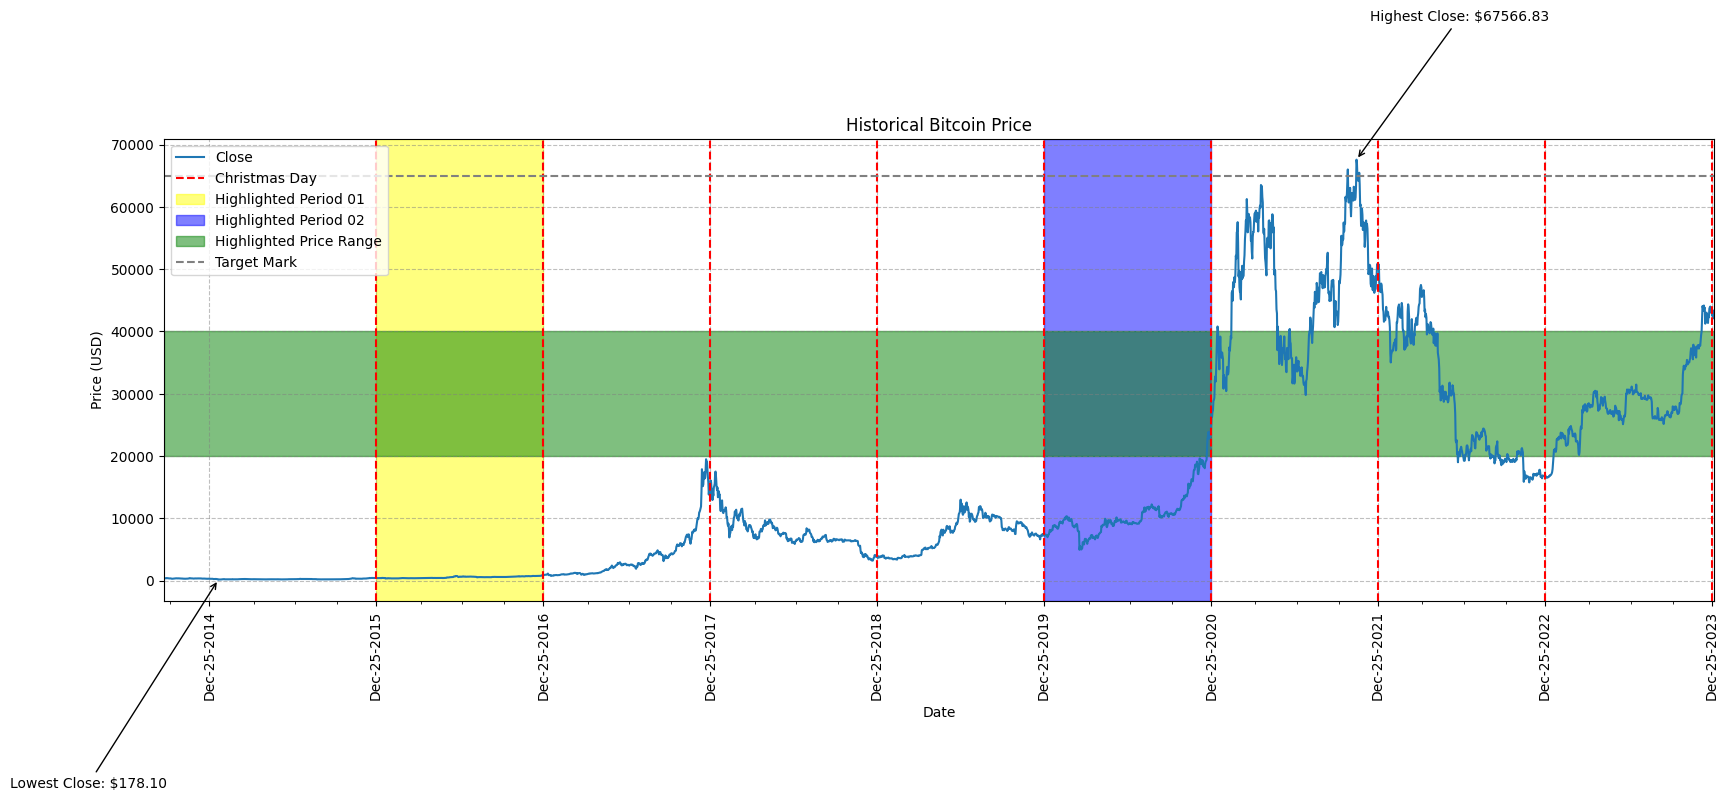

In [51]:
# Question No. 5 (On Notebook)
# Project the graph below with (20, 6) size color should be similar but not exact
# Check the formatting Below

from matplotlib import dates
from datetime import datetime

ax = df_bitcoin['Close'].plot(figsize=(20,6), title="Historical Bitcoin Price", ylabel="Price (USD)")

#x axis must be December-25-Year format
ax.xaxis.set_major_locator(dates.YearLocator(month=12, day=25))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d-%Y'))

#make the ticks vertical
ax.tick_params(axis='x', rotation=90)

[ax.axvline(
    x=datetime(year, 12, 25),
    color='red',
    linestyle='--',
    label="Christmas Day" if year == 2015 else ""
) for year in range(2015, 2024)]

#highlight period from 2015-2016
highlighted_period_date_1 = ax.axvspan(datetime(2015, 12, 25), datetime(2016, 12, 25), color='yellow', alpha=0.5, label="Highlighted Period 01")

#highlight period from 2019-2020
highlighted_period_date_2 = ax.axvspan(datetime(2019, 12, 25), datetime(2020, 12, 25), color='blue', alpha=0.5, label="Highlighted Period 02")

# highlight 20000-40000
highlighted_period_price = ax.axhspan(20000, 40000, color='green', alpha=0.5, label="Highlighted Price Range")

# add target mark at y=65000
ax.axhline(y=65000, color='gray', linestyle='--', label="Target Mark")

#add gray dashed grid
ax.grid(color='gray', linestyle='--', alpha=0.5)

highest_close = df_bitcoin['Close'].max()
lowest_close = df_bitcoin['Close'].min()

#display pointer for highest and lowest
# Annotate Highest Close with $ and two decimal places
ax.annotate(f'Highest Close: ${highest_close:.2f}',
            xy=(df_bitcoin['Close'].idxmax(), highest_close),
            xytext=(10, 100),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'))

# Annotate Lowest Close with $ and two decimal places
ax.annotate(f'Lowest Close: ${lowest_close:.2f}',
            xy=(df_bitcoin['Close'].idxmin(), lowest_close),
            xytext=(-150, -150),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'))



#show legend
ax.legend(loc='upper left')

<ipython-input-52-8892fbc8f6df>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bitcoin_monthly = df_bitcoin['Close'].resample('M').mean()


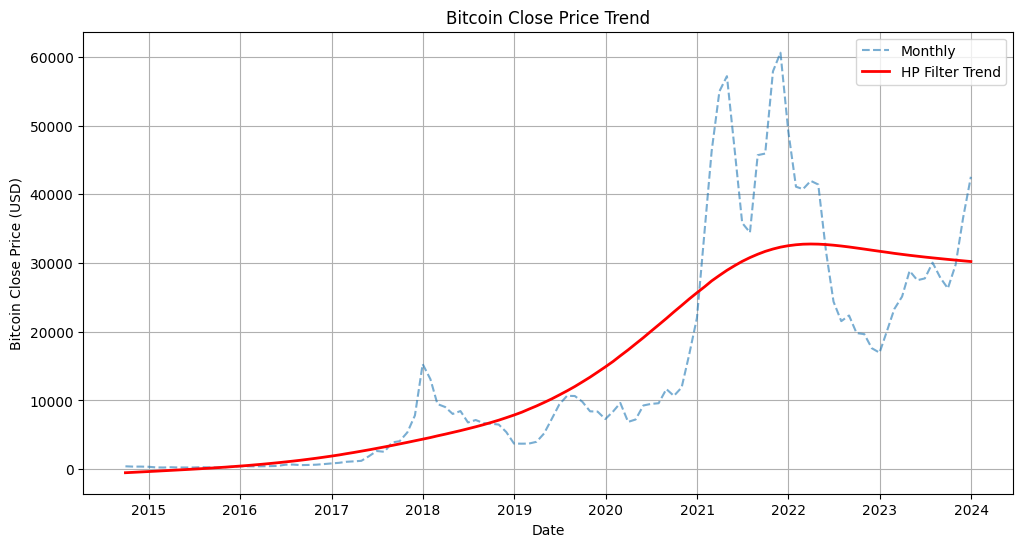

In [52]:
# Question No. 6
# Using HP-Filter resample to monthly mean, what is the trend of bitcoin 'Close' Pricing? (Write your answer)
# Project the appropriate graph to support your answer

from statsmodels.tsa.filters.hp_filter import hpfilter

# Resample to monthly mean
df_bitcoin_monthly = df_bitcoin['Close'].resample('M').mean()

# Apply HP filter
cycle, trend = hpfilter(df_bitcoin_monthly, lamb=14400)

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(df_bitcoin_monthly, label='Monthly', linestyle='dashed', alpha=0.6)
plt.plot(trend, label='HP Filter Trend', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price (USD)')
plt.title('Bitcoin Close Price Trend')
plt.legend()
plt.grid()
plt.show()

<ipython-input-53-c1c782c28331>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_bitcoin_quarterly = df_bitcoin['Close'].resample('Q').mean()


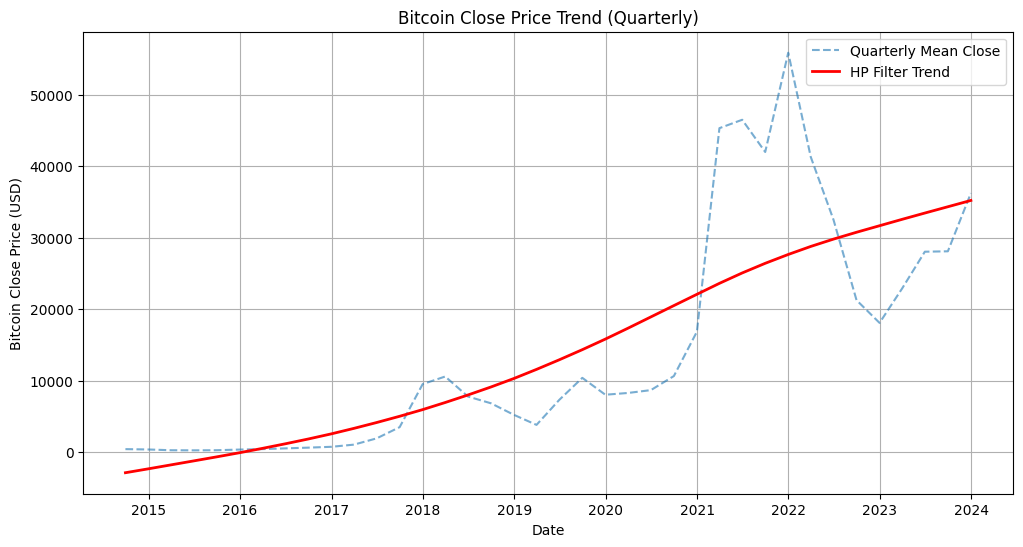

In [53]:
# Question No. 7
# Using HP-Filter resample to Quarterly mean, what is the trend of bitcoin 'Close' Pricing? (Write your answer)
# Project the appropriate graph to support your answer

# Resample Bitcoin closing prices to quarterly mean
df_bitcoin_quarterly = df_bitcoin['Close'].resample('Q').mean()

# Apply HP filter
cycle, trend = hpfilter(df_bitcoin_quarterly, lamb=1600)

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(df_bitcoin_quarterly, label='Quarterly Mean Close', linestyle='dashed', alpha=0.6)
plt.plot(trend, label='HP Filter Trend', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price (USD)')
plt.title('Bitcoin Close Price Trend (Quarterly)')
plt.legend()
plt.grid()
plt.show()

<ipython-input-54-0b11a0ca19af>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_airline_quarterly = df_airline['Thousands of Passengers'].resample('Q').mean()


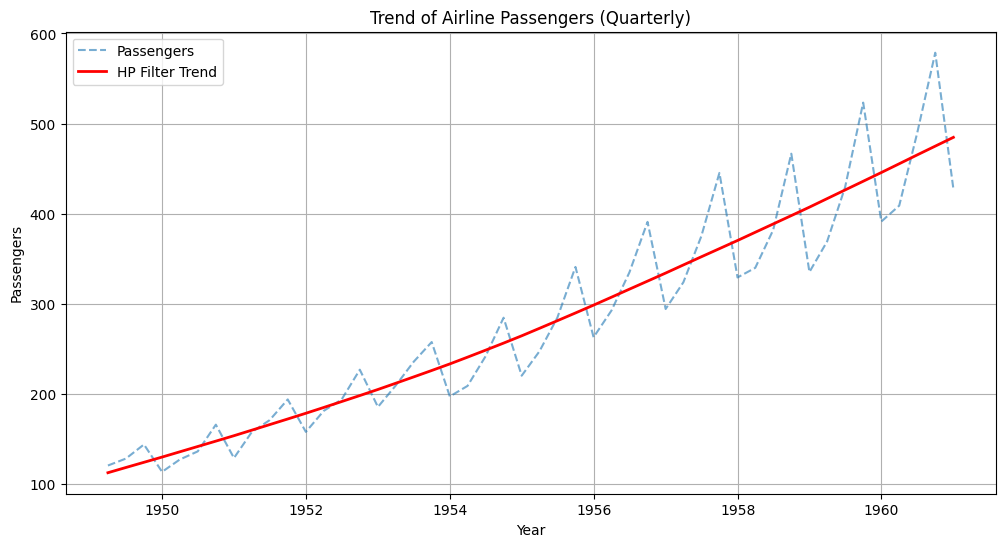

In [54]:
# Question No. 8
# Using HP-Filter resample to Quarterly mean, what is the trend of Airline Passengers? (Write your answer)
# Project the appropriate graph to support your answer

# Resample Passengers to quarterly mean
df_airline_quarterly = df_airline['Thousands of Passengers'].resample('Q').mean()

# Apply HP filter
cycle, trend = hpfilter(df_airline_quarterly, lamb=1600)

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(df_airline_quarterly, label='Passengers', linestyle='dashed', alpha=0.6)
plt.plot(trend, label='HP Filter Trend', color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Trend of Airline Passengers (Quarterly)')
plt.legend()
plt.grid()
plt.show()

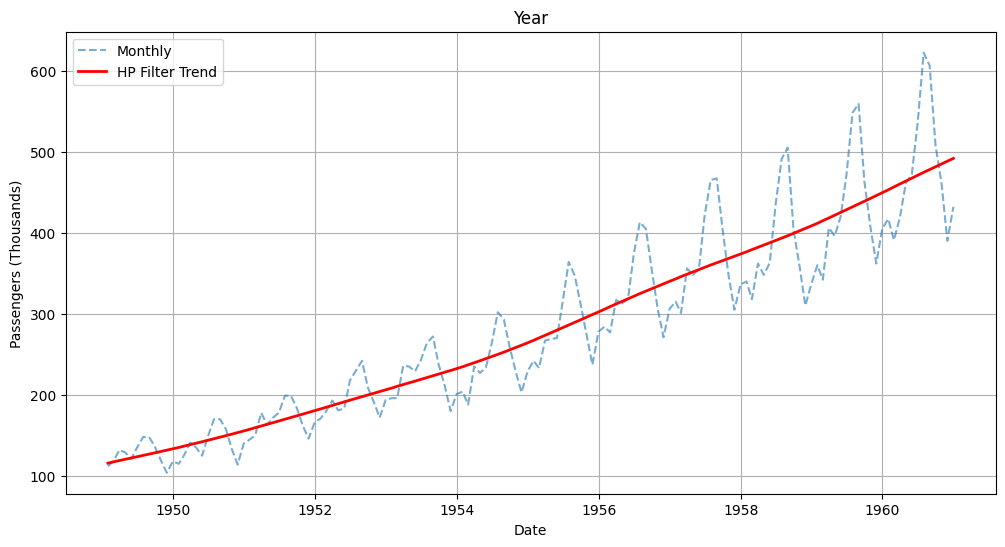

In [55]:
# Question No. 9
# Using HP-Filter resample to Monthly mean, what is the trend of Airline Passengers? (Write your answer)
# Project the appropriate graph to support your answer

# Resample to monthly mean
df_airline_monthly = df_airline['Thousands of Passengers'].resample('ME').mean()

# Apply HP filter
cycle, trend = hpfilter(df_airline_monthly, lamb=14400)

# Plot the trend
plt.figure(figsize=(12,6))
plt.plot(df_airline_monthly, label='Monthly', linestyle='dashed', alpha=0.6)
plt.plot(trend, label='HP Filter Trend', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Passengers (Thousands)')
plt.title('Monthly Mean of Airline Passengers')
plt.legend()
plt.grid()
plt.show()

<ipython-input-57-f498fbcd3f1b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_airline_monthly = df_airline['Thousands of Passengers'].resample('M').mean()
<ipython-input-57-f498fbcd3f1b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bitcoin_monthly = df_bitcoin['Close'].resample('M').mean()


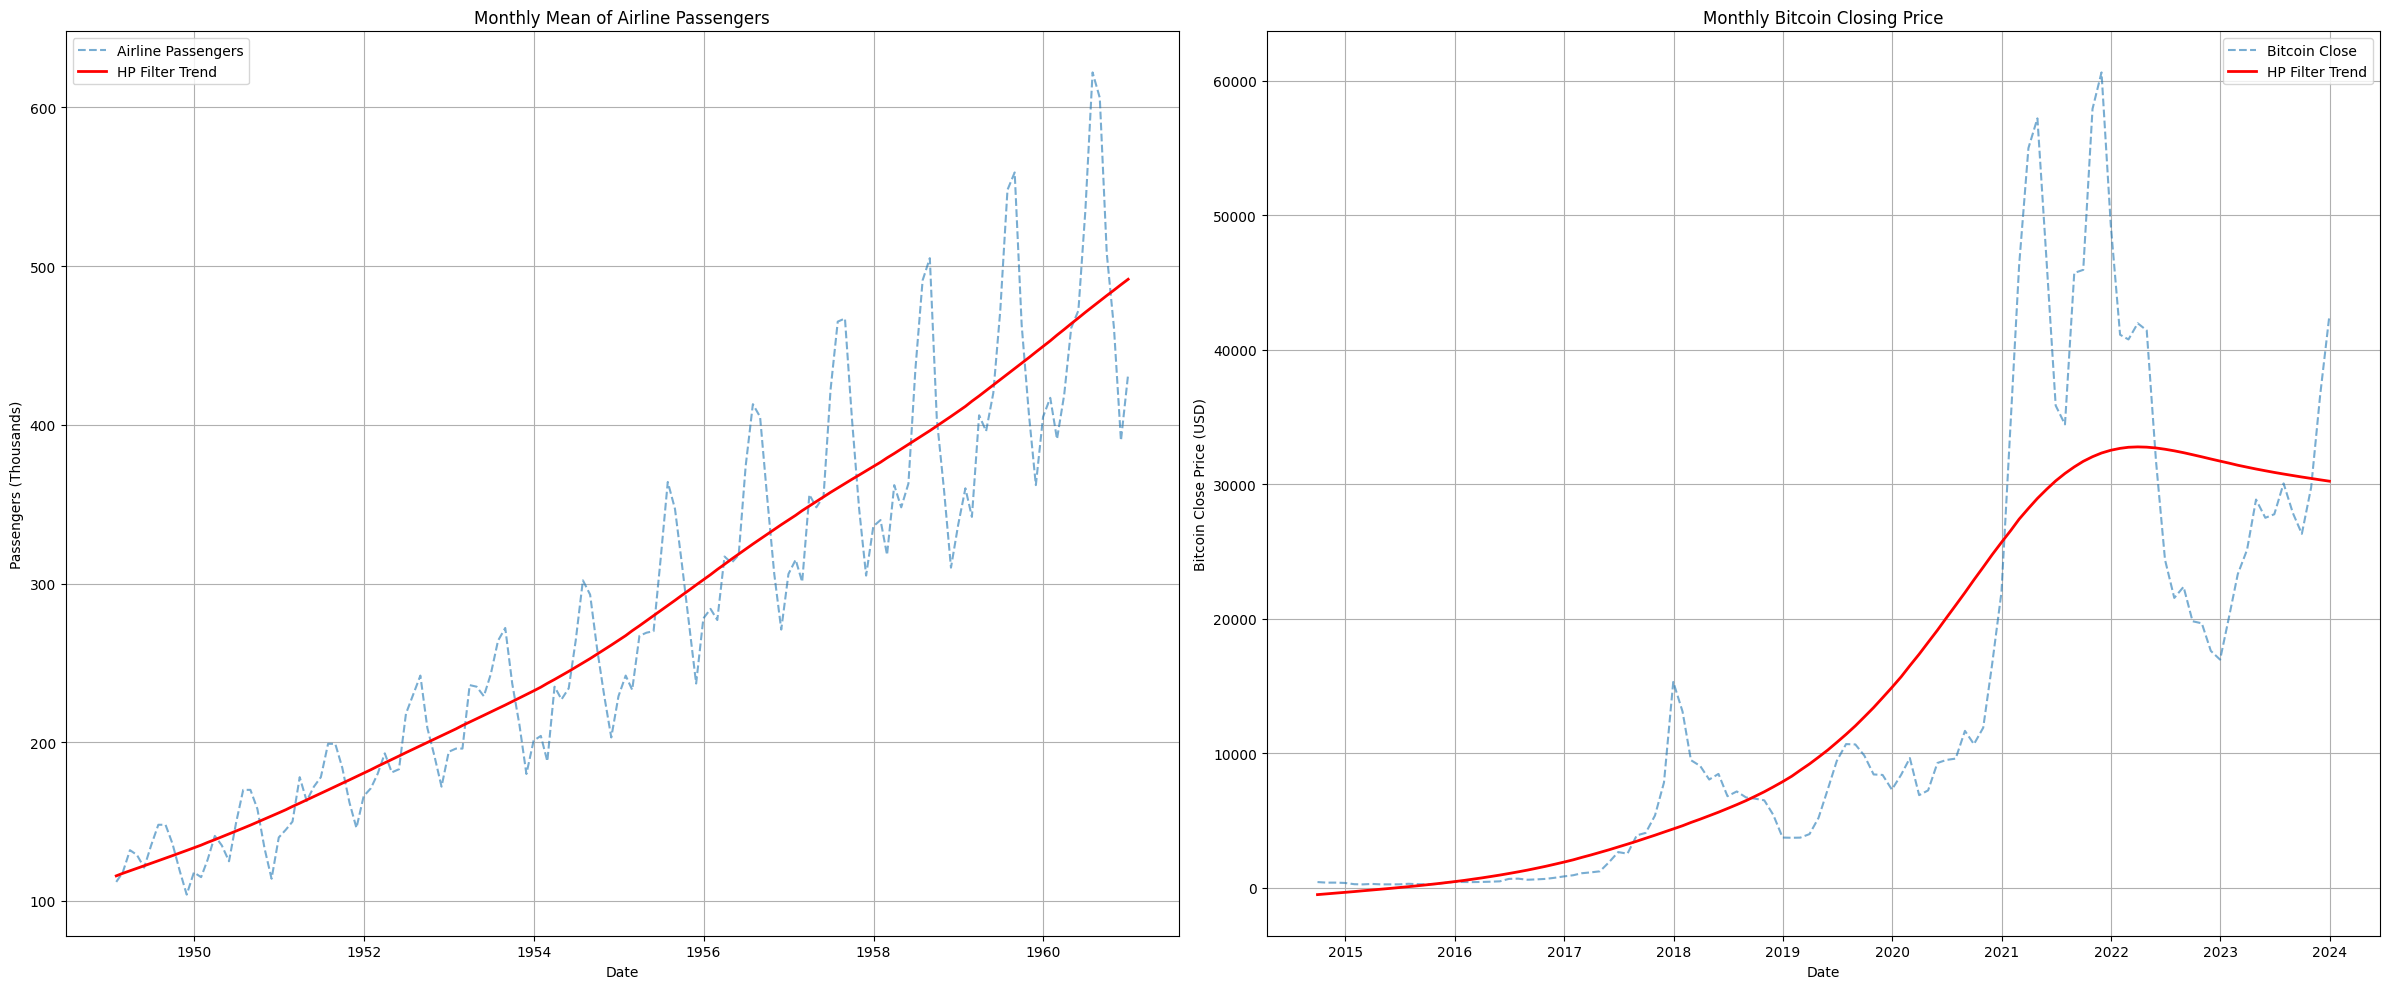

In [57]:
# Question No. 10
# Using HP-Filter what can you infer about the cycles of Bitcoin and airline passengers, if resample to monthly mean? (Write your answer)
# Project the appropriate graph to support your answer

df_airline_monthly = df_airline['Thousands of Passengers'].resample('M').mean()
df_bitcoin_monthly = df_bitcoin['Close'].resample('M').mean()

cycle_airline, trend_airline = hpfilter(df_airline_monthly, lamb=14400)
cycle_bitcoin, trend_bitcoin = hpfilter(df_bitcoin_monthly, lamb=14400)

# Side by side graph

fig, axs = plt.subplots(1, 2, figsize=(24,10))

axs[0].plot(df_airline_monthly, label='Airline Passengers', linestyle='dashed', alpha=0.6)
axs[0].plot(trend_airline, label='HP Filter Trend', color='red', linewidth=2)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passengers (Thousands)')
axs[0].set_title('Monthly Mean of Airline Passengers')
axs[0].legend()
axs[0].grid()

axs[1].plot(df_bitcoin_monthly, label='Bitcoin Close', linestyle='dashed', alpha=0.6)
axs[1].plot(trend_bitcoin, label='HP Filter Trend', color='red', linewidth=2)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Bitcoin Close Price (USD)')
axs[1].set_title('Monthly Bitcoin Closing Price')
axs[1].legend()
axs[1].grid()

# Tight Layout
plt.tight_layout()
plt.show()
